In [0]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

%matplotlib inline

In [0]:
dataset = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv"
df = pd.read_csv(dataset)

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


<h1>Wrong way of making predictions of the stock price</h1>

In [0]:
# Trying to predict the price itself
series = df['close'].values.reshape(-1,1)

In [0]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [11]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,D) # The data is in the form of N x T x D
Y = np.array(Y)
N = len(X)

print ("X.shape: {} Y.shape: {}".format(X.shape,Y.shape))

X.shape: (1249, 10, 1) Y.shape: (1249,)


In [15]:
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.01))
r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=100,
    validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/100
20/20 [==============================] - 1s 33ms/step - loss: 0.4287 - val_loss: 1.4983
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.1322 - val_loss: 0.6564
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0707 - val_loss: 0.4409
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0342 - val_loss: 0.2889
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.1361
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0108 - val_loss: 0.1052
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.0743
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0668
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0608
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0600
Epoch 11

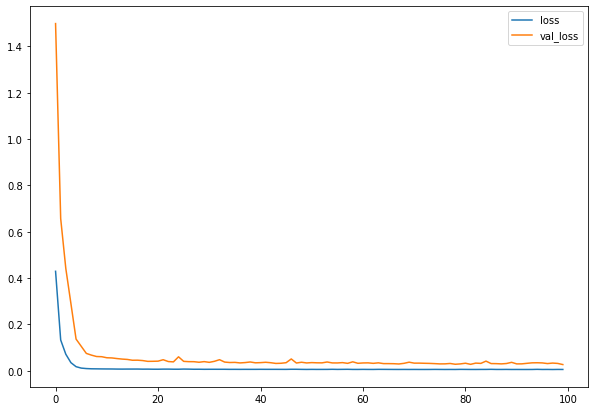

In [16]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

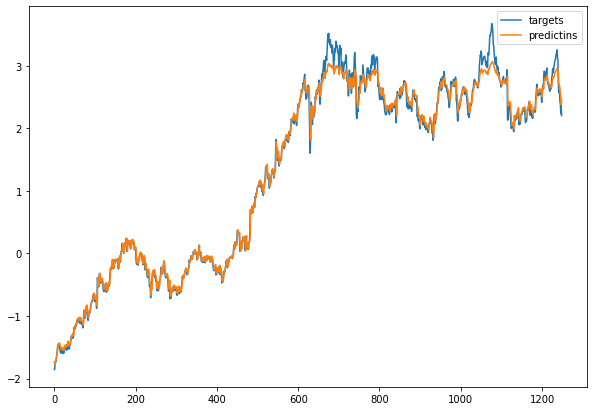

In [17]:
outputs = model.predict(X)
predictions = outputs[:,0]
plt.figure(figsize=(10,7))
plt.plot(Y,label='targets')
plt.plot(predictions,label='predictins')
plt.legend()
plt.show()

# Remember the above way is the wrong way of doing predictions
# Let's now predict using multi-step process.

In [0]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  last_x = np.roll(last_x,-1)
  last_x[-1] = p
  validation_predictions.append(p)

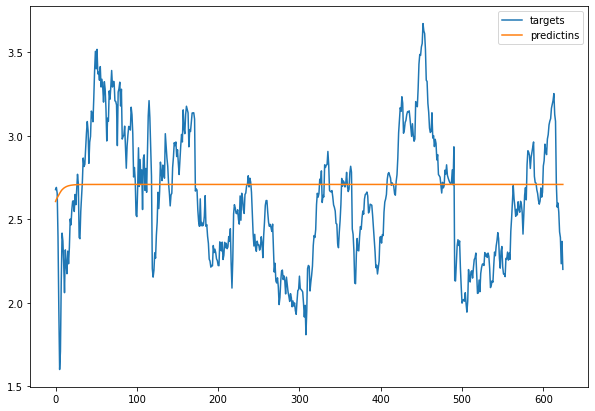

In [19]:
plt.figure(figsize=(10,7))
plt.plot(validation_target,label='targets')
plt.plot(validation_predictions,label='predictins')
plt.legend()
plt.show()

# Here you can see the results are not even closer to what we want.